In [1]:
import numpy as np
sum_upper = np.sum(np.linspace(0.2, 1,5))/ 5
sum_lower = np.sum(np.linspace(0, 0.8, 5)) /5

sum_upper, sum_lower

(0.6, 0.4)

In [2]:
def f(x):
    return x

In [3]:
def sum_N(N):
    #1からNまでの配列
    k_N = np.arange(1, N+1)
    #np.sumを使用して和を計算
    return [np.sum(f(k_N/N) /N), np.sum(f((k_N-1)/N)/N)]

In [4]:
sum_N(5000)

[0.5001, 0.4999]

In [5]:
from sympy import integrate, symbols, init_printing

init_printing(use_latex='mathjax')

x = symbols('x')
integrate(x, (x, 0, 1))

1/2

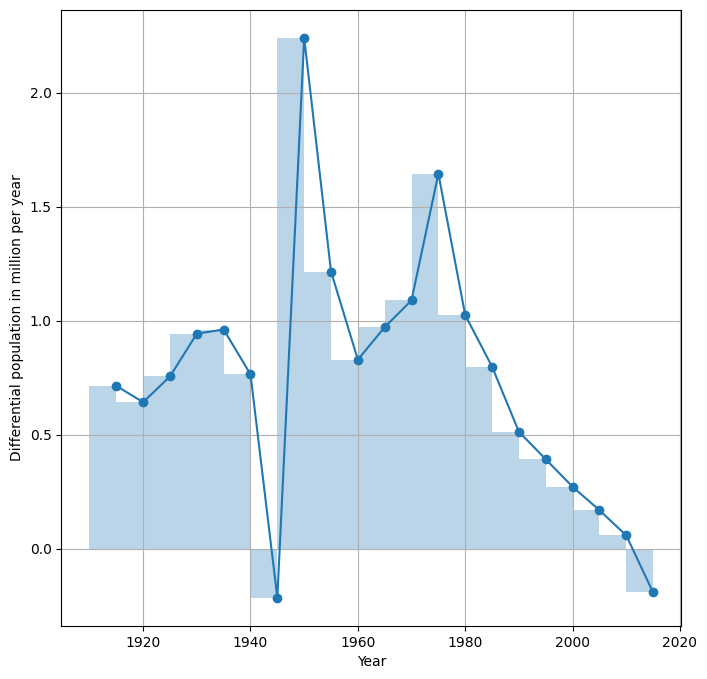

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

[year, diff_rate_jp_pop] = np.load('../data/diff_rate_jp_pop.npy')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(year, diff_rate_jp_pop, marker='o')

ax.bar(year-5, diff_rate_jp_pop,
       width=5, align='edge', alpha=0.3)

ax.set_xlabel('Year')
ax.set_ylabel('Differential population in million per year')

ax.grid()
plt.show()

In [7]:
diff_rate_jp_pop[15]*5

2.5619999999999976

In [8]:
pop_start = 49.184
pop_start + diff_rate_jp_pop[0]*5

52.752

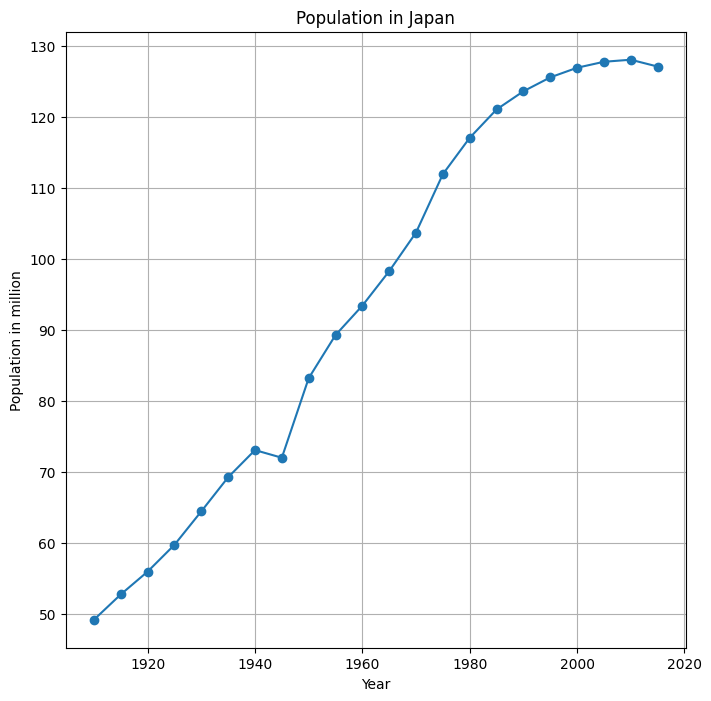

In [9]:
pop_start = 49.184
year_step = 5
pop = [pop_start+ year_step *np.sum(diff_rate_jp_pop[:i+1])
       for i in range(len(diff_rate_jp_pop))]

pop = np.append(pop_start, pop)
year = np.append(1910, year)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(year, pop, marker='o')
ax.set_title('Population in Japan')
ax.set_xlabel('Year')
ax.set_ylabel('Population in million')

ax.grid()
plt.show()


In [10]:
integrate(x**2,x)

 3
x 
──
3 

In [11]:
n = symbols('n')

integrate(x**n, x)

⎧ n + 1            
⎪x                 
⎪──────  for n ≠ -1
⎨n + 1             
⎪                  
⎪log(x)  otherwise 
⎩                  

In [12]:
integrate(1/x, x)

log(x)

In [13]:
from sympy import sin, cos, tan

integrate(sin(x), x)

-cos(x)

In [14]:
integrate(cos(x),x)

sin(x)

In [15]:
integrate(tan(x), x)

-log(cos(x))

In [16]:
from sympy import log
integrate(log(x),x)

x⋅log(x) - x

In [17]:
from sympy import exp
integrate(exp(x),x)

 x
ℯ 

In [18]:
from sympy import lambdify

def plot_integral(f, a, b):
    f_val = lambdify(x,f)
    x_val = np.linspace(a,b,100)
    y_val = np.array([f_val(val) for val in x_val])
    
    plt.fill_between(x_val,y_val, 0, alpha=0.3)
    plt.vlines(b,0, f_val(b), 'b', linestyles=':')
    plt.vlines(a,0,f_val(a), 'b', linestyles=':')

    plt.xticks(np.linspace(a,b,5))
    plt.plot(x_val, y_val, color='black')

    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

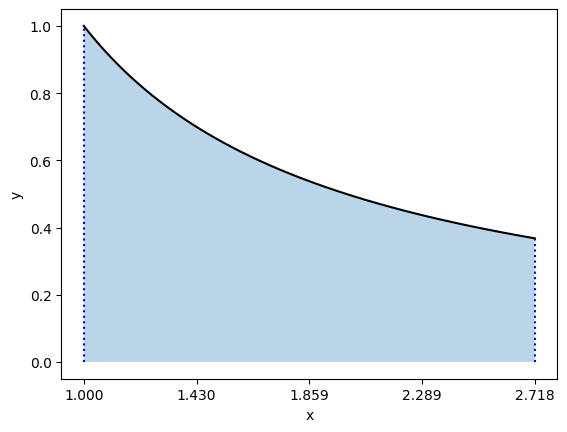

In [19]:
plot_integral(1/x, 1, np.e)

In [20]:
integrate(1/x, (x, 1, np.e))

1.00000000000000

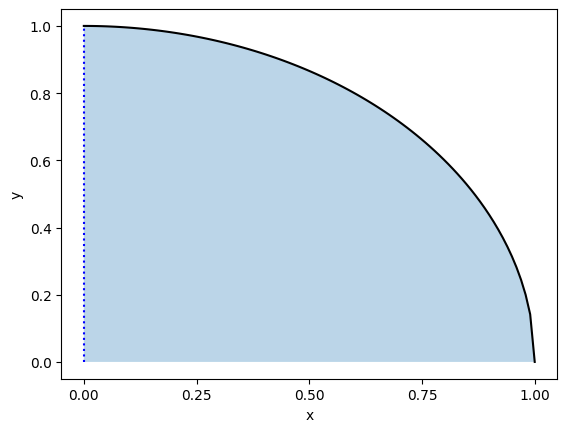

In [21]:
from sympy import sqrt
plot_integral(sqrt(1- x**2), 0,1)

In [22]:
4 * integrate(sqrt(1 - x**2), (x,0,1))

π

In [23]:
r = symbols('r', positive=True)

4 * integrate(sqrt(r**2 - x**2), (x,0,r))

   2
π⋅r 

In [24]:
from sympy import pi

s = symbols('s',real=True, positive=True)
m = symbols('m', real=True)

gaussian = 1/sqrt(2*pi)/s * exp(-(x-m)**2/2/s**2)
gaussian

             2 
    -(-m + x)  
    ───────────
           2   
        2⋅s    
√2⋅ℯ           
───────────────
     2⋅√π⋅s    

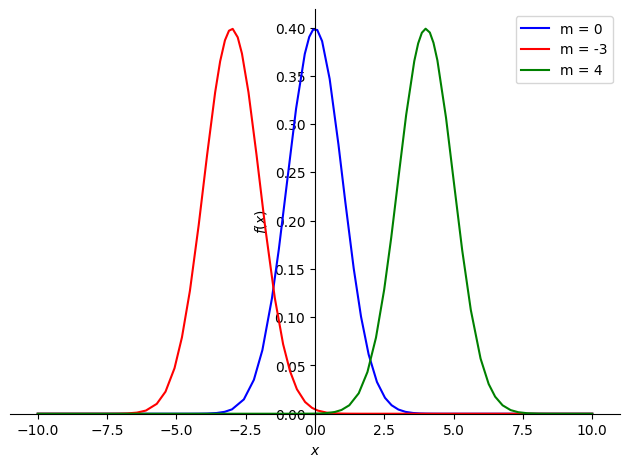

In [25]:
from sympy.plotting import plot

p = plot(gaussian.subs([(s, 1), (m, 0)]),
         gaussian.subs([(s,1), (m, -3)]),
         gaussian.subs([(s, 1), (m, 4)]),
         legend=True, show=False)

p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'

p[0].label = 'm = 0'
p[1].label = 'm = -3'
p[2].label = 'm = 4'

p.show()


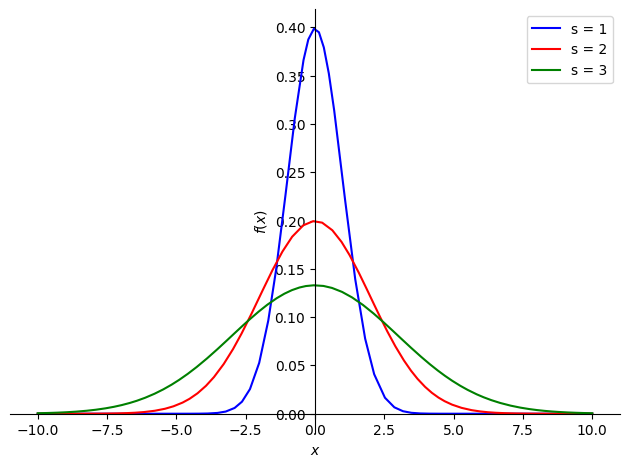

In [26]:
from sympy.plotting import plot

p = plot(gaussian.subs([(s, 1), (m, 0)]),
         gaussian.subs([(s,2), (m, 0)]),
         gaussian.subs([(s, 3), (m, 0)]),
         legend=True, show=False)

p[0].line_color = 'b'
p[1].line_color = 'r'
p[2].line_color = 'g'

p[0].label = 's = 1'
p[1].label = 's = 2'
p[2].label = 's = 3'

p.show()

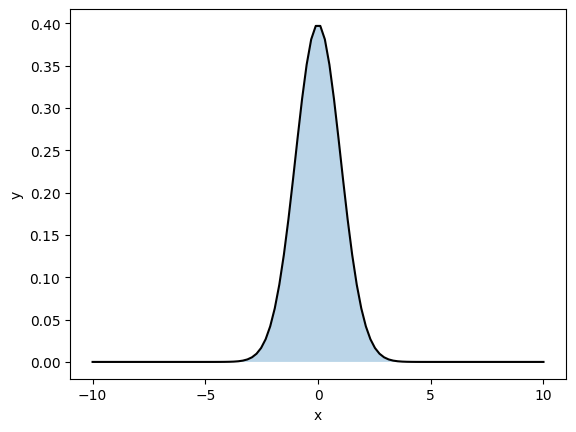

In [27]:
plot_integral(gaussian.subs([(s, 1), (m, 0)]), -10, 10)

In [28]:
from sympy import oo
integrate(gaussian, (x, -oo, oo))

1

In [29]:
from numpy.random import default_rng

rng = default_rng(2)
rng.uniform(0,1)

0.2616121342493164

In [30]:
rng.uniform(0,1,5)

array([0.29849114, 0.81422574, 0.09191594, 0.60010053, 0.72856053])

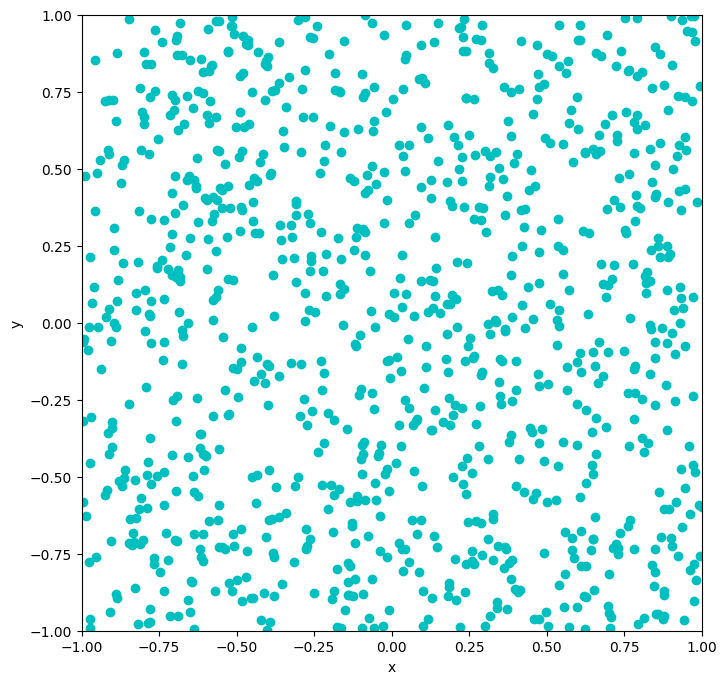

In [31]:
N = 1000
rng = default_rng(2)
x = rng.uniform(-1,1,N)
y = rng.uniform(-1, 1,N)
flg = plt.figure(figsize=(8,8))

plt.scatter(x,y,color='c')

plt.ylim(-1,1)
plt.xlim(-1,1)

plt.ylabel('y')
plt.xlabel('x')

plt.show()

In [32]:
r = np.sqrt(x**2 + y**2)

x_in = x[r <= 1]
y_in = y[r <= 1]

x_out = x[r > 1]
y_out = y[r > 1]

In [33]:
print(f'Data length, x_in: {len(x_in)}, x_out: {len(x_out)}')

Data length, x_in: 771, x_out: 229


In [35]:
print(f'Data length, y_in: {len(y_in)}, y_out: {len(y_out)}')

Data length, y_in: 771, y_out: 229


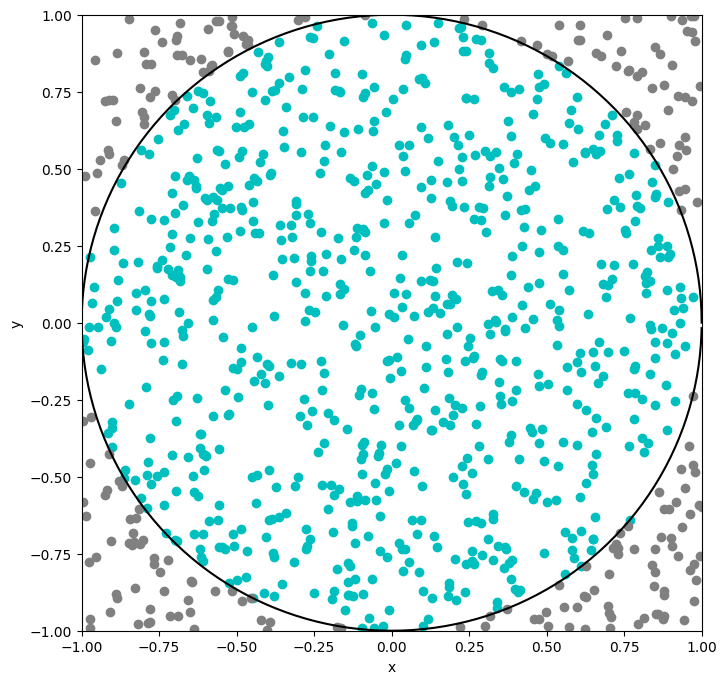

In [34]:
theta = np.arange(0,360, 1)

x_circle =np.cos(np.radians(theta))
y_circle = np.sin(np.radians(theta))

fig = plt.figure(figsize=(8,8))

plt.scatter(x_in, y_in, color='c')
plt.scatter(x_out, y_out, color='gray')

plt.plot(x_circle,y_circle, color='k')

plt.ylim(-1,1)
plt.xlim(-1,1)

plt.ylabel('y')
plt.xlabel('x')

plt.show()

In [36]:
np.sum(r<=1)/N*4

3.084

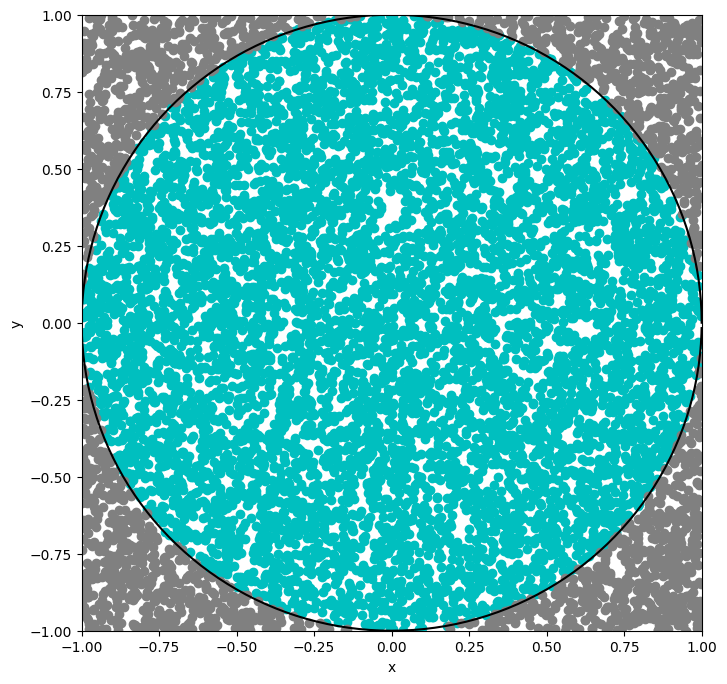

In [37]:
N=10000
rng = default_rng(2)

x = rng.uniform(-1,1,N)
y = rng.uniform(-1,1,N)

r = np.sqrt(x**2 + y**2)
x_in = x[r<=1]
y_in = y[r<=1]

x_out = x[r>1]
y_out = y[r>1]

fig = plt.figure(figsize=(8,8))
plt.scatter(x_in, y_in, color='c')
plt.scatter(x_out, y_out, color='gray')
plt.plot(x_circle,y_circle, color='k')

plt.ylim(-1,1)
plt.xlim(-1,1)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [38]:
np.sum(r<=1)/N*4

3.126